In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
# Load dataset
df = pd.read_csv("WWC.csv" )

In [6]:
df.head()

,Year,Match Number,City,Date,Winner,Team 1,Team 2,Total Score for Team 1,Total Wicket for Team 1,Total Score for Team 2,Total Wicket for Team 2,Batting team,Bowling team,Over Number,Runs Scored in over,Runs Scored till that over,Wicket Taken in over,Wickets Taken till that over,Winning Details,Match Detail
0,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,ENG,NZ,1,12,12,0,0,New Zealand won by 9 wickets (with 82 balls re...,"1st Match (D/N), Ahmedabad, October 05, 2023,\..."
1,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,ENG,NZ,2,0,12,0,0,New Zealand won by 9 wickets (with 82 balls re...,"1st Match (D/N), Ahmedabad, October 05, 2023,\..."
2,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,ENG,NZ,3,4,16,0,0,New Zealand won by 9 wickets (with 82 balls re...,"1st Match (D/N), Ahmedabad, October 05, 2023,\..."
3,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,ENG,NZ,4,5,21,0,0,New Zealand won by 9 wickets (with 82 balls re...,"1st Match (D/N), Ahmedabad, October 05, 2023,\..."
4,2023,1st Match (D/N),Ahmedabad,October 05 2023,New Zealand,ENG,NZ,282,9,283,1,ENG,NZ,5,5,26,0,0,New Zealand won by 9 wickets (with 82 balls re...,"1st Match (D/N), Ahmedabad, October 05, 2023,\..."


In [7]:
# Strip column name whitespace
df.columns

Index(['Year', 'Match Number', 'City', 'Date', 'Winner', 'Team 1', 'Team 2',
       'Total Score for Team 1', 'Total Wicket for Team 1',
       'Total Score for Team 2', 'Total Wicket for Team 2', 'Batting team',
       'Bowling team', 'Over Number', 'Runs Scored in over',
       'Runs Scored till that over', 'Wicket Taken in over',
       'Wickets Taken till that over', 'Winning Details', 'Match Detail'],
      dtype='object')

In [8]:
# Convert Date column to datetime
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [9]:
df["Date"]

0       2023-10-05
1       2023-10-05
2       2023-10-05
3       2023-10-05
4       2023-10-05
           ...    
21026   2007-04-28
21027   2007-04-28
21028   2007-04-28
21029   2007-04-28
21030   2007-04-28
Name: Date, Length: 21031, dtype: datetime64[ns]

In [10]:
# Ensure Year column exists
if "Year" not in df.columns:
    df["Year"] = df["Date"].dt.year

In [11]:
df["Year"]

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
21026    2007
21027    2007
21028    2007
21029    2007
21030    2007
Name: Year, Length: 21031, dtype: int64

In [12]:
# Convert score & wickets to numeric
num_cols = [    "Total Score for Team 1", "Total Score for Team 2",
                "Total Wicket for Team 1", "Total Wicket for Team 2"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [13]:
df[col] 

0        1
1        1
2        1
3        1
4        1
        ..
21026    8
21027    8
21028    8
21029    8
21030    8
Name: Total Wicket for Team 2, Length: 21031, dtype: int64

In [14]:
# Create a unique Match ID
df["match_id"] = (
    df["Match Number"].astype(str) + "-" +
    df["Year"].astype(str) + "-" +
    df["City"].astype(str)
)

In [15]:
df["match_id"]

0        1st Match (D/N)-2023- Ahmedabad
1        1st Match (D/N)-2023- Ahmedabad
2        1st Match (D/N)-2023- Ahmedabad
3        1st Match (D/N)-2023- Ahmedabad
4        1st Match (D/N)-2023- Ahmedabad
                      ...               
21026             Final-2007- Bridgetown
21027             Final-2007- Bridgetown
21028             Final-2007- Bridgetown
21029             Final-2007- Bridgetown
21030             Final-2007- Bridgetown
Name: match_id, Length: 21031, dtype: object

### Match Level Aggregation (one row per match)

In [16]:
agg_dic = {
    "Total Score for Team 1": "max",
    "Total Score for Team 2": "max",
    "Total Wicket for Team 1": "max",
    "Total Wicket for Team 2": "max",
    "Winner": "first",
    "City": "first",
    "Year": "first",
    "Team 1": "first",
    "Team 2": "first"
}

match_df = df.groupby("match_id").agg(agg_dic).reset_index()

In [17]:
match_df

,match_id,Total Score for Team 1,Total Score for Team 2,Total Wicket for Team 1,Total Wicket for Team 2,Winner,City,Year,Team 1,Team 2
0,10th Match (D/N)-2023- Lucknow,311,177,7,10,South Africa,Lucknow,2023,SA,AUS
1,10th Match-2007- Group A,358,129,5,10,Australia,Group A,2007,AUS,NED
2,10th Match-2011- Group A (D/N),277,266,7,9,Pakistan,Group A (D/N),2011,PAK,SL
3,10th Match-2015- Pool B,310,160,6,10,West Indies,Pool B,2015,WI,PAK
4,10th match-2019- Nottingham,288,273,10,9,Australia,Nottingham,2019,AUS,WI
...,...,...,...,...,...,...,...,...,...,...
234,Final (D/N)-2011- Wankhede,274,277,6,4,India,Wankhede,2011,SL,IND
235,Final (D/N)-2015- Melbourne,183,186,10,3,Australia,Melbourne,2015,NZ,AUS
236,Final (D/N)-2023- Ahmedabad,240,241,10,4,Australia,Ahmedabad,2023,IND,AUS
237,Final-2007- Bridgetown,281,215,4,8,Australia,Bridgetown,2007,AUS,SL


# Highest innings score & team

In [18]:
match_df["Highest Innings Score"] = match_df[
    ["Total Score for Team 1", "Total Score for Team 2"]].max(axis=1)

match_df["Highest Scoring Team"] = match_df.apply(
    lambda r: r["Team 1"] if r["Total Score for Team 1"] >= r["Total Score for Team 2"]
    else r["Team 2"],
    axis=1)


In [19]:
print([match_df["Highest Innings Score"],match_df["Highest Scoring Team"]])

[0      311
1      358
2      277
3      310
4      288
      ... 
234    277
235    186
236    241
237    281
238    241
Name: Highest Innings Score, Length: 239, dtype: int64, 0       SA
1      AUS
2      PAK
3       WI
4      AUS
      ... 
234    IND
235    AUS
236    AUS
237    AUS
238     NZ
Name: Highest Scoring Team, Length: 239, dtype: object]


##Analysis 1: Match Winners

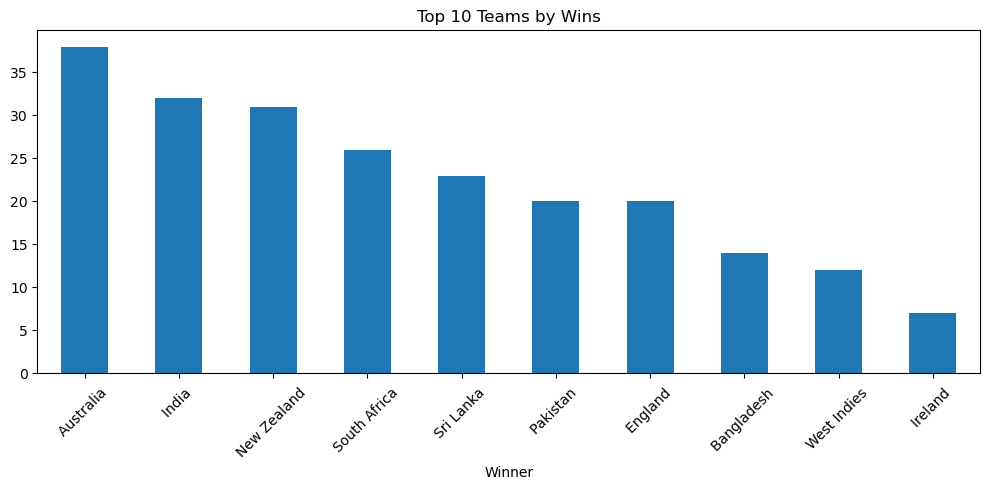

In [20]:
winner_counts = match_df["Winner"].value_counts()
plt.figure(figsize=(10,5))
winner_counts.head(10).plot(kind="bar")
plt.title("Top 10 Teams by Wins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Analysis 2: Average Scores Over Time

In [21]:
avg_by_year = match_df.groupby("Year")["Highest Innings Score"].mean()

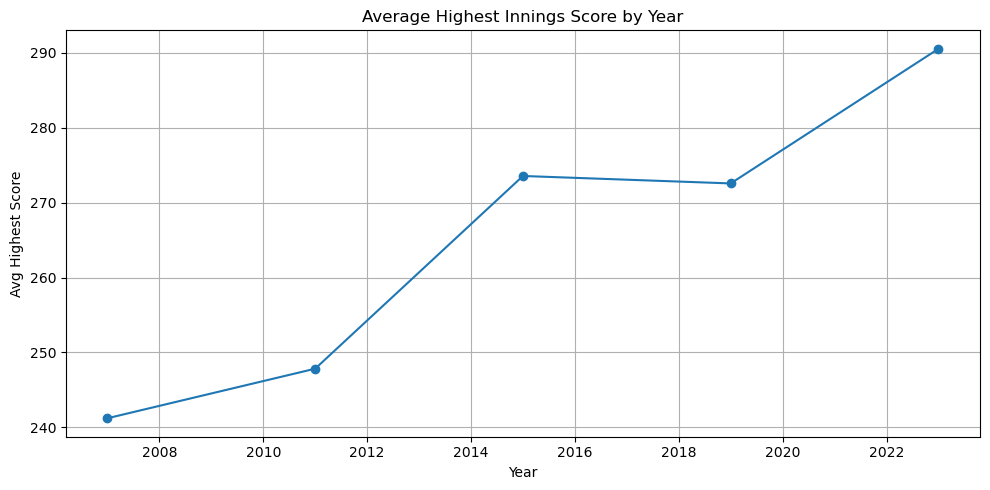

In [22]:
plt.figure(figsize=(10,5))
avg_by_year.plot(marker="o")
plt.title("Average Highest Innings Score by Year")
plt.xlabel("Year")
plt.ylabel("Avg Highest Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
print("\n📌 Average Score by Year:\n", avg_by_year)


📌 Average Score by Year:
 Year
2007    241.215686
2011    247.833333
2015    273.562500
2019    272.568182
2023    290.541667
Name: Highest Innings Score, dtype: float64


## Analysis 3: Top 10 Highest Scoring Matches

In [24]:
top_matches = match_df.nlargest(10, "Highest Innings Score")
print("\n🔥 Top 10 Highest Scoring Matches:")
print(top_matches[["match_id", "Team 1", "Team 2", "Highest Innings Score", "Winner"]])



🔥 Top 10 Highest Scoring Matches:
                                match_id Team 1 Team 2  Highest Innings Score  \
202          4th Match (D/N)-2023- Delhi     SA     SL                    428   
89         26th Match-2015- Pool A (D/N)    AUS    AFG                    417   
9               12th Match-2007- Group B    IND    BER                    413   
79         24th Match-2015- Pool B (D/N)     SA    IRE                    411   
196     45th Match (D/N)-2023- Bengaluru    IND    NED                    410   
42         19th Match-2015- Pool B (D/N)     SA     WI                    408   
146           35th Match-2023- Bengaluru     NZ    PAK                    401   
57       20th Match (D/N)-2023- Wankhede     SA    ENG                    399   
76          24th Match (D/N)-2023- Delhi    AUS    NED                    399   
53   1st Semi-Final (D/N)-2023- Wankhede    IND     NZ                    397   

            Winner  
202  South Africa   
89      Australia   
9         

## Analysis 4: Runs per Over

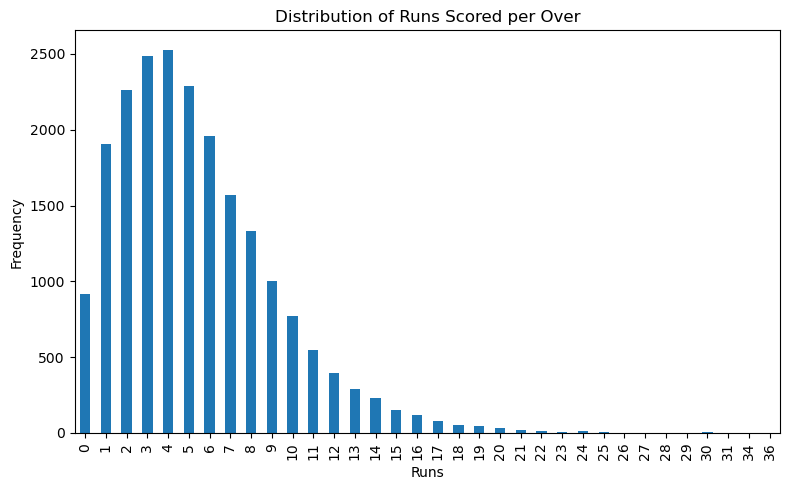

In [25]:
runs_col = "Runs Scored in over"
if runs_col in df.columns:
    runs_per_over = df[runs_col].value_counts().sort_index()

    plt.figure(figsize=(8,5))
    runs_per_over.plot(kind="bar")
    plt.title("Distribution of Runs Scored per Over")
    plt.xlabel("Runs")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


## Save Cleaned Match Summary

In [26]:
out_file = "WWC_match_summary.csv"
match_df.to_csv(out_file, index=False)

In [27]:
match_df

,match_id,Total Score for Team 1,Total Score for Team 2,Total Wicket for Team 1,Total Wicket for Team 2,Winner,City,Year,Team 1,Team 2,Highest Innings Score,Highest Scoring Team
0,10th Match (D/N)-2023- Lucknow,311,177,7,10,South Africa,Lucknow,2023,SA,AUS,311,SA
1,10th Match-2007- Group A,358,129,5,10,Australia,Group A,2007,AUS,NED,358,AUS
2,10th Match-2011- Group A (D/N),277,266,7,9,Pakistan,Group A (D/N),2011,PAK,SL,277,PAK
3,10th Match-2015- Pool B,310,160,6,10,West Indies,Pool B,2015,WI,PAK,310,WI
4,10th match-2019- Nottingham,288,273,10,9,Australia,Nottingham,2019,AUS,WI,288,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...
234,Final (D/N)-2011- Wankhede,274,277,6,4,India,Wankhede,2011,SL,IND,277,IND
235,Final (D/N)-2015- Melbourne,183,186,10,3,Australia,Melbourne,2015,NZ,AUS,186,AUS
236,Final (D/N)-2023- Ahmedabad,240,241,10,4,Australia,Ahmedabad,2023,IND,AUS,241,AUS
237,Final-2007- Bridgetown,281,215,4,8,Australia,Bridgetown,2007,AUS,SL,281,AUS


In [28]:
print("\n Match-level summary saved as:", out_file)
print("\n Analysis Complete!")


 Match-level summary saved as: WWC_match_summary.csv

 Analysis Complete!
